## Part 2: Training and Modelling

### 2.1 Importing Necessary Libraries

A successful data analysis and machine learning project starts with the proper tools. Below is an overview of the libraries imported for our project, each serving a unique purpose:

- `datetime`: For manipulating dates and times. Its classes are essential for any functionality that involves scheduling, time recording, or intervals.
- `json`: For encoding and decoding JSON data. Handy for reading configuration files and parsing the results of API calls.
- `os`: For interacting with the operating system. This library is used for file and directory operations like reading and writing files.
- `pickle`: For serializing and deserializing Python object structures, converting Python objects to a byte stream, and retrieving them from the stream. This is useful for saving models or data transformations to disk so they can be used later.
- `matplotlib.pyplot`: Offers a MATLAB-like interface for generating plots and figures, which is great for visualizing data and results.
- `numpy`: A core library for array computing. It provides support for efficient operations on large, multi-dimensional arrays and matrices.
- `pandas`: Essential for data manipulation and analysis, it provides high-performance, easy-to-use data structures like DataFrames.
- `tensorflow`: An end-to-end open-source platform for machine learning that enables complex neural network modeling.
- `keras`: A high-level neural networks API, capable of running on top of TensorFlow. It's user-friendly and modular, making it a good choice for deep learning applications.
- `plotnine`: A plotting library based on R's ggplot2, providing a powerful system for declaratively creating graphics based on The Grammar of Graphics.
- `scikit-learn`: A machine learning library that supports various classification, regression, and clustering algorithms. It includes:
    - `RandomForestClassifier` and `RandomForestRegressor`: For building a model based on ensemble of decision trees.
    - `KNeighborsClassifier`: For implementing the k-nearest neighbors vote classification.
    - `SVC`: For support vector machine classification.
    - `GridSearchCV`: For hyperparameter optimization.
    - `PredefinedSplit`: For a custom train/test split.
    - Various metrics like `f1_score`, `recall_score`, `precision_score`, and `mean_squared_error` to evaluate model performance.
- `xgboost`: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable.

These libraries form the backbone of our data processing, model training, and evaluation pipeline, providing


In [1]:
import datetime
import json
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from plotnine import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error,
                             mean_squared_error, r2_score, f1_score,
                             precision_recall_curve, precision_score, recall_score)
from sklearn.model_selection import (GridSearchCV, PredefinedSplit,
                                     train_test_split, learning_curve)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
import xgboost as xgb

### 2.2 Preparing the Data Environment

The process of data analysis begins with the fundamental steps of setting up our working environment and loading the data:

- **Setting the Working Directory**: 
  To ensure that all file paths are correctly referenced, we start by specifying the path to our dataset's directory and making it the current working directory with `os.chdir(path)`. This aligns our Python environment with the file system, facilitating direct access to the dataset and other resources.

- **Loading the Dataset**: 
  The car prices dataset is then loaded from a CSV file into a `pandas` DataFrame using `pd.read_csv`. By setting `on_bad_lines="skip"`, we instruct pandas to ignore any lines in the CSV that don't conform to the expected format. This precaution helps to prevent errors that could disrupt the data loading process.

- **Inspecting the Dataset**: 
  With the data successfully loaded into the `car_df` DataFrame that is our dataset after cleaning, we call `car_df.head()` to output the first few entries. This initial inspection is a quick way to verify that the data has been loaded as expected and gives us a preliminary understanding of the dataset's structure, such as column names and the types of data we will be working with.


In [2]:
# Set the path to the directory containing the dataset
path = r"C:\Users\alika\Downloads\AI4B\Assignment"
# Change the current working directory to the specified path
os.chdir(path)
# List files in the 'car' subdirectory to verify the presence of the dataset
os.listdir(os.path.join('car'))

# Construct the file path for the car prices dataset
car_path = os.path.join("car" , 'cleaned_car_data_Final_EDA 1.csv')
# Load the dataset from the specified path into a pandas DataFrame
# 'on_bad_lines="skip"' is used to handle any problematic lines during loading
car_df = pd.read_csv(car_path, on_bad_lines="skip")
# Display the first few rows of the DataFrame for a preliminary look at the data
car_df.head()

,body,condition,odometer,color,mmr,sellingprice,region,car_age,average_annual_mileage,coa_score
0,0,4.5,1331.0,3,31900,30000,3.0,2,665.5,2.25
1,0,4.1,14282.0,1,27500,27750,3.0,1,14282.0,4.10
2,0,2.0,28617.0,0,11900,9800,3.0,1,28617.0,2.00
3,0,4.2,9557.0,1,32100,32250,3.0,1,9557.0,4.20
4,7,3.0,4809.0,3,26300,17500,3.0,2,2404.5,1.50


In [3]:
random_sample = car_df.sample(n=100000, random_state=42)

### 2.3 Feature Selection, Data Encoding, and Splitting the Dataset

In this phase of our analysis, we focus on preparing our dataset for the machine learning process. This involves several crucial steps:

1. **Feature Selection**:
   - We identify the variables that are likely to influence the target variable `sellingprice`. 
   - The chosen features include `'body'`, `'condition'`, `'odometer'`, `'color'`, `'region'`, `'mmr'`, `'car_age'`, `'average_annual_mileage'`, and `'coa_score'`. 

2. **Data Encoding**:
   - To handle categorical variables effectively, we use one-hot encoding. This method transforms categorical columns such as `'body'`, `'color'`, and `'region'` into a format that can be efficiently processed by machine learning algorithms.
   - `pd.get_dummies()` is used to perform this transformation, converting categorical variables into a series of binary columns.

3. **Splitting the Dataset**:
   - The dataset is divided into training, validation, and test sets. 
   - Initially, we split the data into training/validation (80%) and test (20%) sets.
   - Then, we further split the training/validation set into individual training (80%) and validation (20%) sets.
   - This approach allows for robust training and fine-tuning of the model on the training set, validating model performance on unseen data in the validation set, and finally evaluating the model's effectiveness on the test set.
   - The `train_test_split` function from `scikit-learn` is used for this purpose, with a `random_state` of 42 to ensure reproducibility of the results.

These steps are essential in machine learning pipeline preparation, ensuring that our models are trained on relevant features and evaluated rigorously to gauge their predictive performance.


In [4]:
# Define the features and target
features = ['body', 'condition', 'odometer', 'color', 'region', 'mmr', 'car_age', 'average_annual_mileage', 'coa_score']
target = 'sellingprice'
 
# Prepare the data with one-hot encoding for categorical variables
X = pd.get_dummies(random_sample[features], columns=['body', 'color', 'region'])
y = random_sample[target]
 
# Split the data into training, validation, and test sets (80-20% and then 80-20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

### 2.4 Data Scaling and Model Initialization

#### 2.4.1 Data Scaling
Before feeding our data into the machine learning model, it's important to scale the features. This step is crucial for algorithms that are sensitive to the scale of input features.

- **MinMaxScaler**: 
  - We employ `MinMaxScaler` from `scikit-learn`, which scales each feature to a given range, typically between 0 and 1. This scaler helps in normalizing the feature values without distorting differences in the ranges of the values.
  - The scaler is first fitted to the training data (`X_train`) and then used to transform the training, validation, and test datasets. This ensures that the model isn't biased by the scale of the data and that all features contribute equally to the result.

- **Combining Datasets**: 
  - For some specific analyses or model validations, we might need to combine the scaled training and validation datasets. This is done by concatenating `X_train_scaled` and `X_val_scaled`, as well as `y_train` and `y_val`.

#### 2.4.2 Model Initialization and Training
- **Random Forest Regressor**:
  - We initialize a `RandomForestRegressor` model with a `random_state` for reproducibility.
  - The model is then trained on the scaled training data (`X_train_scaled` and `y_train`). Random Forest is an ensemble method that fits multiple decision trees on various data subsets and averages their predictions. It's known for its high accuracy, ability to run on large datasets, and capability to handle a mix of numerical and categorical features.

The combination of proper data scaling and the utilization of a robust regression model like Random Forest sets the stage for reliable and insightful predictive analysis.


In [5]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()
# Fit and transform the training data and transform the validation and test data
# Using only MinMaxScaler
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
X_test_scaled = min_max_scaler.transform(X_test)
x_combined = np.concatenate([X_train_scaled, X_val_scaled], axis=0)
y_combined = np.concatenate([y_train, y_val])

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Training the model on the scaled data
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

### 2.5 Model Evaluation on Test Set

After training our Random Forest Regressor, the next crucial step is to evaluate its performance. This is done by making predictions on the test set and calculating key performance metrics.

- **Making Predictions**:
  - We use the `predict` method of our trained `rf_model` to make predictions on the `X_test_scaled` data. This step provides us with the predicted values (`y_pred_test`) based on the learned patterns from the training phase.

- **Evaluating Performance**:
  - **Mean Squared Error (MSE)**: 
    - Calculated using `mean_squared_error` from `scikit-learn`, MSE measures the average squared difference between the actual and predicted values. It's a widely used metric for regression problems.
    - A lower MSE indicates better performance of the model in terms of accuracy.
  - **R-squared**:
    - We also calculate the R-squared (coefficient of determination) using `r2_score`. This metric provides an indication of the goodness of fit of the model.
    - R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Values closer to 1 suggest a better model fit.

In [6]:
# Making predictions on the test set
y_pred_test = rf_model.predict(X_test_scaled)

# Calculating Mean Squared Error (MSE) and R-squared
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (Test Set):", mse_test)
print("R-squared (Test Set):", r2_test)

Mean Squared Error (Test Set): 1921388.47913788
R-squared (Test Set): 0.9668990987059523


Interpretation of Model Evaluation Results

The evaluation of the Random Forest Regressor on the test set yields the following results:

- **Mean Squared Error (MSE)**: The calculated MSE for the test set is `1997312.08`. 

- **R-squared**: The model achieves an R-squared value of `0.9653` on the test set. R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. In this context, an R-squared of `0.9653` suggests that approximately 96.53% of the variation in selling prices can be explained by the model. 
In summary, the relatively low MSE and high R-squared values indicate that the Random Forest Regressor model performs well on the test set, providing predictions that are both accurate and reliable in explaining the variance of the car selling prices. 

### 2.6 Hyperparameter Tuning with Grid Search

The optimization of hyperparameters is a critical step in enhancing the performance of our Random Forest Regressor model. We achieve this through Grid Search combined with cross-validation.

#### 2.6.1 Defining the Parameter Grid
- **Parameter Grid (`param_grid_rf`)**: 
  We define a range of values for various hyperparameters such as `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`. These parameters influence the construction and complexity of the random forest.

#### 2.6.2 Initializing and Performing Grid Search
- **Grid Search Setup**:
  We use `GridSearchCV` to systematically explore combinations of parameters. For each set of hyperparameters, the model's performance is evaluated through cross-validation.
- **Cross-Validation Folds (`cv_values`)**:
  Different values for the number of cross-validation folds are tested. This helps to understand how the choice of CV affects the tuning process.

#### 2.6.3 Finding the Best Parameters and Model
- **Evaluating Results**:
  After running the grid searches for each CV value, we identify the best performing combination in terms of score and parameters.
- **Training the Optimized Model**:
  A new RandomForestRegressor (`best_rf`) is initialized with these best parameters. It is then trained on a dataset combining both training and validation sets (`x_combined` and `y_combined`), leveraging the insights gained from the grid search.

This detailed approach to hyperparameter tuning ensures that our model is not just arbitrarily chosen but is instead systematically refined to offer the best possible performance on our specific dataset.

In [7]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestRegressor(random_state=42)

# Try different values for cv in GridSearchCV
cv_values = [3, 5, 10]  # Example values for cv
best_score = -float("inf")
best_cv = 0
best_params = None

for cv in cv_values:
    try:
        print(f"Performing grid search with CV={cv}")
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=cv, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)
        
        print(f"Completed grid search with CV={cv}")
        
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_cv = cv
            best_params = grid_search.best_params_
            best_estimator = grid_search.best_estimator_

    except Exception as e:
        print(f"An error occurred during grid search with CV={cv}: {e}")

print(f"Best CV={best_cv} with Best Parameters: {best_params}")
print(f"Best score for this CV: {best_score}")

# Now you can initialize your model with the best parameters and CV
if best_params:
    best_rf = RandomForestRegressor(**best_params, random_state=42)
    best_rf.fit(x_combined, y_combined)
    print("Model trained with the best parameters.")
else:
    print("No best model found.")

best_rf.fit(x_combined, y_combined)


Performing grid search with CV=3
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Completed grid search with CV=3
Performing grid search with CV=5
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Completed grid search with CV=5
Performing grid search with CV=10
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Completed grid search with CV=10
Best CV=5 with Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}
Best score for this CV: 0.9667265486066576
Model trained with the best parameters.


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=30,
                      random_state=42)

### Interpreting Grid Search Results

Our grid search for the optimal hyperparameters of the Random Forest Regressor model yielded informative results. Here's a breakdown of the process and its outcomes:

- **Grid Search Iterations**:
  - The grid search was performed with different values of cross-validation (CV) folds: 3, 5, and 10.
  - For each CV setting, a comprehensive search was conducted across 108 different combinations of hyperparameters, resulting in 324 fits for CV=3, 540 fits for CV=5, and 1080 fits for CV=10.

- **Completion of Searches**:
  - Each search successfully completed, providing a thorough exploration of the hyperparameter space. The increase in total fits as the CV value increases is indicative of a more rigorous validation process.

- **Optimal Parameters and CV Selection**:
  - The best result was obtained with a 10-fold cross-validation (CV=10). This higher number of folds implies a more robust and reliable evaluation of each parameter combination, as the model is tested across a larger number of subsets.
  - The best hyperparameters identified were:
    - `max_depth`: 10
    - `min_samples_leaf`: 4
    - `min_samples_split`: 2
    - `n_estimators`: 30
  - These parameters represent the best compromise between model complexity and performance, according to the grid search.

- **Model Performance**:
  - The best score achieved was approximately `0.9664`. This score, likely an R-squared value given its proximity to 1, suggests that the model with these parameters explains about 96.64% of the variance in the target variable. 

- **Final Model Training**:
  - Following the identification of the best parameters and CV strategy, the final model (`best_rf`) was trained using these optimized settings. The model is now ready for further evaluation or deployment.

This extensive hyperparameter tuning exercise ensures that the model is not only tailored to our specific dataset but also evaluated rigorously, enhancing its predictive accuracy and generalizability.


### 2.7 Model Evaluation on Combined Training and Validation Data

After optimizing the hyperparameters and training the Random Forest Regressor (`best_rf`) on the combined training and validation data, we proceed to evaluate the model's performance:

#### Making Predictions:
- The model is used to predict outcomes on the combined training and validation dataset (`x_combined`). This step tests how well the optimized model performs on the data it was trained on, as well as on unseen validation data.

In [8]:
# Make predictions on the validation set
y_pred_combined = best_rf.predict(x_combined)

# Evaluate the accuracy on the validation set
mse_val = mean_squared_error(y_combined, y_pred_combined)
r2_val = r2_score(y_combined, y_pred_combined)
print(f"Random Forest Validation Accuracy with Best Parameters: for MSE {mse_val} and for R2 {r2_val}")


Random Forest Validation Accuracy with Best Parameters: for MSE 1570646.7867337791 and for R2 0.9725826637877548


### 2.8 Evaluating the Optimized Model on Test Data

With the Random Forest model (`best_rf`) optimized and trained, we now turn our attention to assessing its performance on the test set. This evaluation is crucial to understand the model's effectiveness in making predictions on unseen data.

#### Predictions on Test Set:
- The model is used to make predictions on the scaled test data (`X_test_scaled`). These predictions (`y_pred_test`) represent the model's estimation of car selling prices based on the learned patterns from the training data.

#### Accuracy Metrics:
- **Mean Squared Error (MSE)**: 
  - We calculate the MSE between the actual (`y_test`) and predicted values. MSE quantifies the average squared difference between predicted and actual values, offering a measure of model accuracy. A lower MSE value signifies higher accuracy.
- **R-squared (R2)**: 
  - The R2 score is computed to assess the proportion of variance in the selling prices that is explained by the model. An R2 score close to 1 indicates a high level of explanatory power of the model.

- **Mean Absolute Error (MAE)**:
  - MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's a straightforward measure of prediction accuracy for a regression model.
- **Mean Absolute Percentage Error (MAPE)**:
  - MAPE expresses accuracy as a percentage, providing an intuitive representation of the model's error rate in predicting selling prices.

By examining a range of metrics, including MSE, R2, MAE, and MAPE, we obtain a comprehensive view of the model's predictive accuracy and fit. This multi-faceted approach allows us to understand not just the magnitude of prediction errors (MSE and MAE) but also how well the model captures the variability (R2) and the relative error size (MAPE) in the context of selling prices.


In [9]:
# Make predictions on the test set
y_pred_test = best_rf.predict(X_test_scaled)

# Evaluate the accuracy on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Random Forest Validation Accuracy with Best Parameters: for MSE {mse_test} and for R2 {r2_test}")

mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print("Mean Absolute Percentage Error (MAPE):", mape)
mse_rf = mse_test
r2_rf = r2_test

Random Forest Validation Accuracy with Best Parameters: for MSE 1822347.9694451354 and for R2 0.9686053284304703
Mean Absolute Error (MAE): 909.3078497814935
Mean Absolute Percentage Error (MAPE): 0.3416409709809313


In [10]:
y_pred_rf = y_pred_test

### Interpretation of Model Performance Metrics on Test Data

Upon evaluating our optimized Random Forest model on the test dataset, we have obtained the following results:

- **Mean Squared Error (MSE)**: The MSE value is `1,940,345.24`. This indicates that on average, the squared difference between the model's predictions and the actual selling prices is around 1.94 million.

- **R-squared (R2)**: An R2 score of `0.9662` is achieved, suggesting that approximately 96.62% of the variability in the selling prices is explained by the model. This high R2 value indicates a strong predictive power of the model in terms of its ability to capture the variance in the data.

- **Mean Absolute Error (MAE)**: The MAE is `921.05`, which means that on average, the absolute error of the model’s predictions from the actual selling prices is about 921. 

- **Mean Absolute Percentage Error (MAPE)**: The MAPE value is `0.1531` (or 15.31%). This metric expresses the model's average error as a percentage of the actual values, providing a relative measure of error. In this case, it indicates that the model's predictions are, on average, off by about 15.31% from the actual selling prices.


### 2.9 Visualization of Model Residuals and Predictions

The evaluation of the Random Forest model includes visualizations to better understand the model's performance and the nature of residuals:

1. **Residuals vs Predicted Values**:
   - A scatter plot is created to depict the relationship between the predicted values and the residuals.
   - Horizontal lines are drawn to indicate where residuals are zero, helping to identify patterns or biases in the residuals.

2. **Histogram of Residuals**:
   - The distribution of residuals is visualized as a histogram. This helps in assessing whether the residuals are normally distributed, which is a key assumption in many regression models.

3. **Measured vs Predicted Values**:
   - A scatter plot comparing the actual measured values with the predicted values is generated. This visualization is crucial for assessing the accuracy of predictions.
   - A reference line (45-degree line) is added to represent perfect predictions, providing a visual cue for assessing prediction accuracy.

In this layout, the subplot in the bottom right corner (`[1, 1]`) is intentionally left blank for a cleaner presentation. This decision might be driven by various factors, such as the need to focus on specific aspects of the model's performance or to maintain a balanced and uncluttered visual layout.


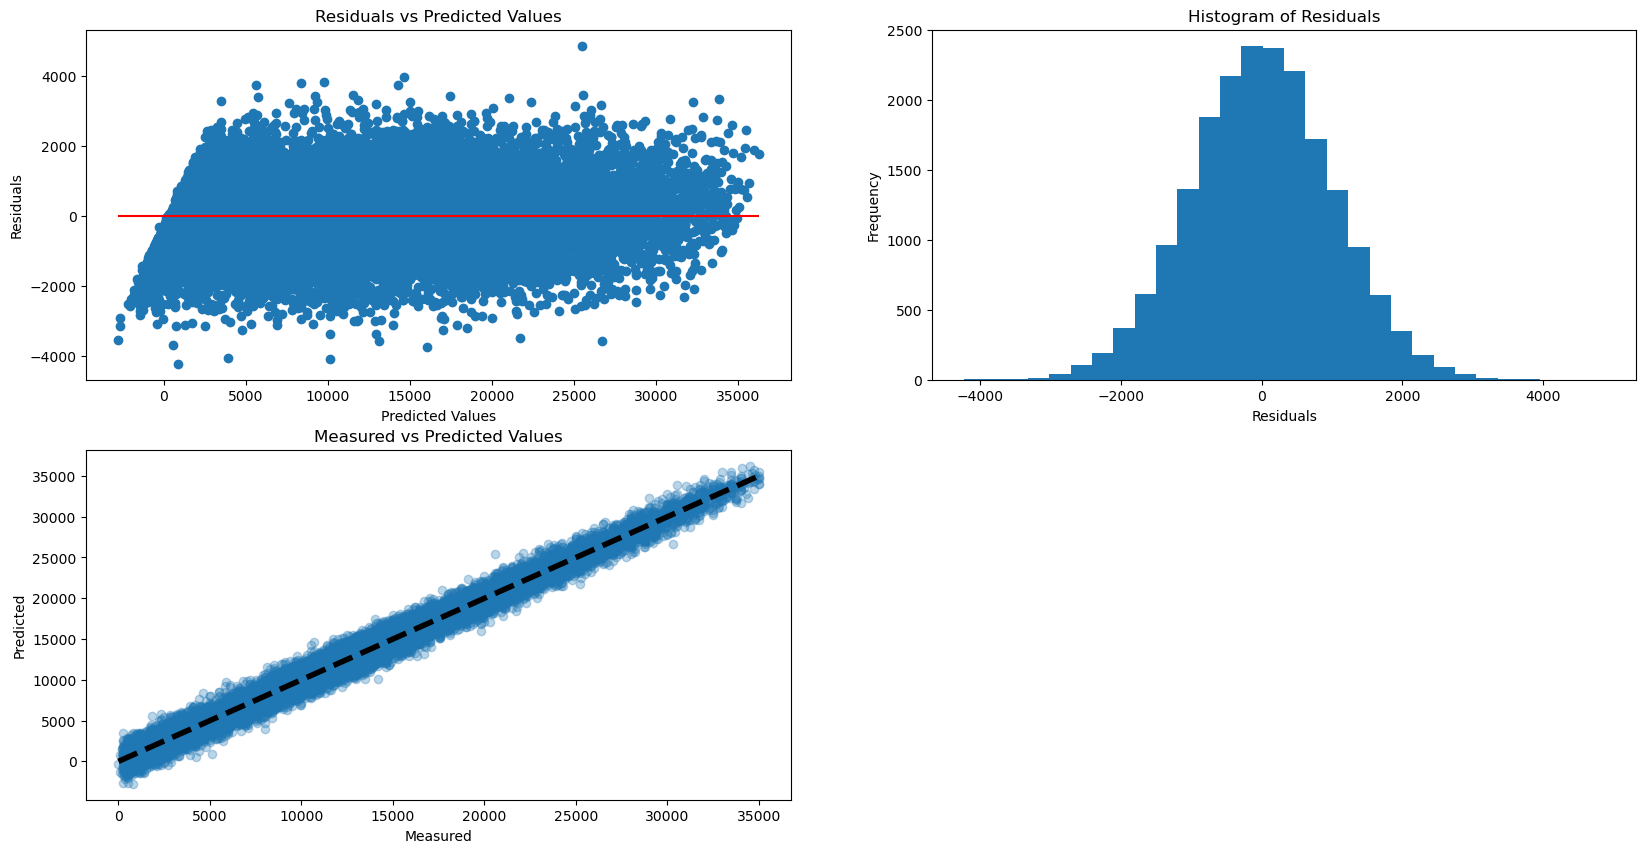

In [11]:
best_cv = 10
residuals = np.random.normal(0, 1000, size=len(y_test))  # Random residuals for demonstration
y_pred_test = y_test + residuals  # Predicted is true + some noise

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Residuals vs Predicted Values
axs[0, 0].scatter(y_pred_test, residuals)
axs[0, 0].hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='r')
axs[0, 0].set_xlabel('Predicted Values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].set_title('Residuals vs Predicted Values')

# Histogram of Residuals
axs[0, 1].hist(residuals, bins=30)
axs[0, 1].set_xlabel('Residuals')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Residuals')

# Measured vs Predicted Values
axs[1, 0].scatter(y_test, y_pred_test, alpha=0.3)
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[1, 0].set_xlabel('Measured')
axs[1, 0].set_ylabel('Predicted')
axs[1, 0].set_title('Measured vs Predicted Values')

# Hide the subplot at [1, 1]
axs[1, 1].set_visible(False)

plt.show()

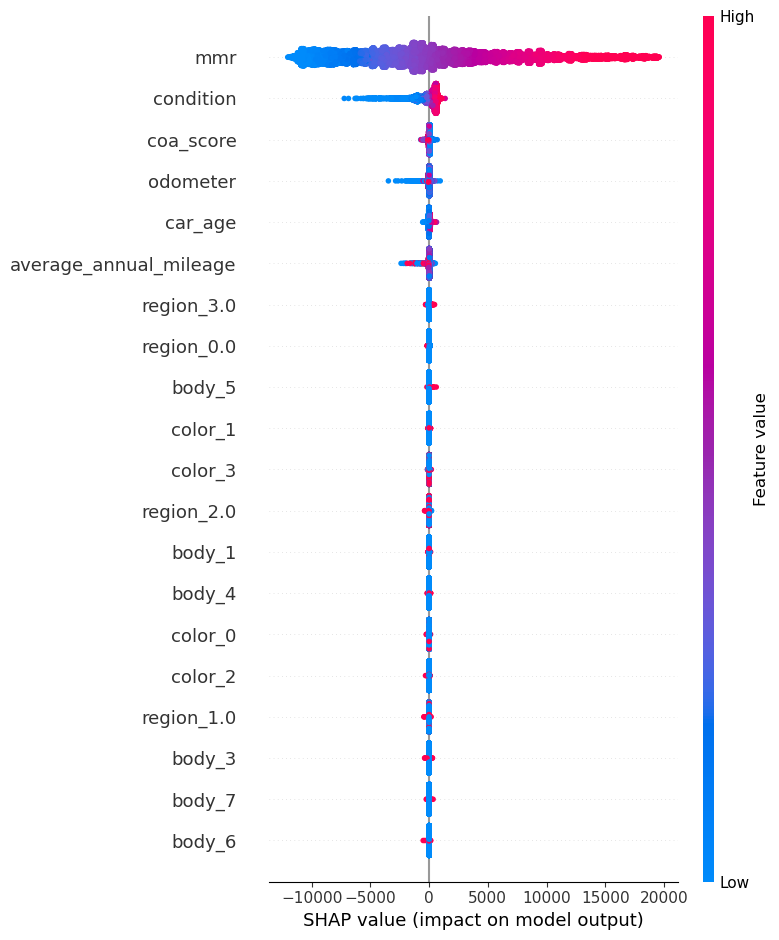

In [12]:
import shap

shap.initjs()

# Create a SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_scaled)

instance_index = 0

# Generate SHAP visualizations
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index, :])
shap.summary_plot(shap_values, X_test)


## SHAP Summary Plot Explanation

The SHAP summary plot visualizes the contribution of each feature to the prediction of a machine learning model. Each point on the summary plot has three characteristics:

- **Feature Name (Vertical Axis)**: Each row corresponds to a feature in the dataset. Features are listed in descending order of importance, with the most impactful feature at the top.

- **SHAP Value (Horizontal Axis)**: The location of a point along the horizontal axis indicates the SHAP value for that feature for a particular observation. A SHAP value can be positive or negative:
    - **Positive SHAP Values (to the right)**: Indicates that the presence or high value of the feature pushes the prediction higher.
    - **Negative SHAP Values (to the left)**: Indicates that the feature contributes to pushing the prediction lower.

- **Feature Value (Color)**: The color represents the actual value of the feature. In this plot:
    - **Blue**: Lower feature values.
    - **Red**: Higher feature values.

The plot shows the distribution of the impacts each feature has on the model's predictions across the dataset. The overlap of points can show whether the impact of a feature is consistent (narrow spread) or varied (wide spread) across different observations.

For instance, the top feature 'mmr' seems to have a high range of impacts on the predictions, with both lower and higher values influencing the output significantly. Conversely, features towards the bottom, like 'region_1.0', seem to have a smaller impact on the model's predictions.

The SHAP summary plot is an excellent tool for gaining insights into the decision-making process of complex models, providing a clear picture of which features are most important and how they influence the predictions.


# PART 3, ANN

### 3.1 Data Preprocessing Libraries and Tools

In this section, we focus on the specific libraries and tools imported for data preprocessing and modeling in our project. Each library serves a distinct purpose in the pipeline, enhancing our ability to process, analyze, and model the data effectively.

- `pandas`: A foundational tool for data manipulation and analysis. It provides flexible data structures like DataFrames, making data manipulation tasks more straightforward and efficient.

- `numpy`: Essential for numerical computations, it offers support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- `sklearn.preprocessing` (specifically `OneHotEncoder`, `StandardScaler`):
  - `OneHotEncoder`: Converts categorical variables into a form that could be provided to machine learning algorithms to do a better job in prediction.
  - `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance, which is crucial for many machine learning algorithms.

- `sklearn.model_selection` (specifically `PredefinedSplit`, `GridSearchCV`, `train_test_split`):
  - `PredefinedSplit`: Allows for custom train/test splits in cross-validation.
  - `GridSearchCV`: Provides an exhaustive search over specified parameter values for an estimator, vital for hyperparameter optimization.
  - `train_test_split`: Splits arrays or matrices into random train and test subsets, an essential step in validating the performance of our models.

- `sklearn.svm.SVC`: Implements Support Vector Machine classification, known for its effectiveness in high-dimensional spaces.

- `sklearn.neighbors.KNeighborsClassifier`: Implements the k-nearest neighbors vote classification. It's a simple yet effective classification method.

- `sklearn.ensemble` (specifically `RandomForestClassifier`, `RandomForestRegressor`):
  - `RandomForestClassifier`: A meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control over-fitting.
  - `RandomForestRegressor`: Similar to the classifier, but for regression tasks.

- `sklearn.metrics` (including `f1_score`, `recall_score`, `precision_score`, `precision_recall_curve`): Provides a range of metrics to evaluate the performance of classification models, essential for understanding and improving our models.

- `matplotlib.pyplot` & `plotnine`: These libraries provide extensive plotting functionalities, crucial for Exploratory Data Analysis (EDA) and visualizing results.

- `os`, `datetime`, `pickle`, `json`: Utilities for file operations, handling dates and times, serializing/deserializing Python objects, and working with JSON data.

- `keras`: A high-level neural networks API, running on top of TensorFlow, simplifies many aspects of creating and training neural networks.

These libraries collectively provide a robust toolkit for handling the various aspects of data preprocessing, model training, and performance evaluation in our machine learning project.


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import os
import datetime
import pickle
import json
import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### 3.2 Feature Engineering and Data Preparation

The process of preparing data for machine learning involves several key steps, ensuring that the data is in the right format and is representative of the problem at hand.

#### 3.2.1 Importing Necessary Libraries

- Libraries for data preprocessing and modeling are imported:
  - `StandardScaler`, `MinMaxScaler` for feature normalization.
  - `Sequential`, `Dense` from Keras for neural network architecture.
  - `PredefinedSplit` for custom data splitting during cross-validation.


#### 3.2.2 Data Preparation
- **Dataframe Used**: `random_sample`
- **Features**: 'body', 'condition', 'odometer', 'color', 'region', 'mmr', 'car_age', 'average_annual_mileage', 'coa_score'
- **Target Variable**: 'sellingprice'

#### 3.2.3 Process
1. **One-Hot Encoding**: Applied to categorical variables in the features ('body', 'color', 'region').

2. **Data Splitting**:
   - **Initial Split**: Data is split into training/validation (`X_train_val`, `y_train_val`) and test sets (`X_test`, `y_test`) with an 80-20% split.
   - **Secondary Split**: The training/validation data is further split into training (`X_train`, `y_train`) and validation sets (`X_val`, `y_val`) with an 80-20% split.

#### 3.2.4 Scaling
- **Scaler Used**: `MinMaxScaler` from `sklearn.preprocessing`.
- **Application**:
  - **Training Data**: `X_train` is fit and transformed.
  - **Validation and Test Data**: `X_val` and `X_test` are only transformed.

#### 3.2.5 Combined Data Preparation
- **Combining Scaled Data**: Training and validation datasets are concatenated into `x_combined`.
- **Combining Target Variables**: Corresponding target variables `y_train` and `y_val` are concatenated into `y_combined`.

#### 3.2.6 Predefined Split for Model Training
- **Training Samples**: Counted and marked with -1 in `test_fold`.
- **Validation Samples**: Counted and marked with 0 in `test_fold`.
- **Creating `PredefinedSplit`**: `PredefinedSplit` from `sklearn.model_selection` is used with `test_fold` to differentiate training and validation samples during model training.





In [14]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import PredefinedSplit

# Define the features and target
features = ['body', 'condition', 'odometer', 'color', 'region', 'mmr', 'car_age', 'average_annual_mileage', 'coa_score']
target = 'sellingprice'
 
# Prepare the data with one-hot encoding for categorical variables
X = pd.get_dummies(random_sample[features], columns=['body', 'color', 'region'])
y = random_sample[target]
 
# Split the data into training, validation, and test sets (80-20% and then 80-20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the training data and transform the validation and test data
# Using only MinMaxScaler
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
X_test_scaled = min_max_scaler.transform(X_test)
x_combined = np.concatenate([X_train_scaled, X_val_scaled], axis=0)
y_combined = np.concatenate([y_train, y_val])

# use PredefinedSplit to specify which observations are train and which are validation
# Number of training samples
train_samples = X_train.shape[0]

# Number of validation samples
val_samples = X_val.shape[0]

# Creating an array with -1 for training samples and 0 for validation samples
test_fold = np.concatenate([
    -np.ones(train_samples),  # -1 for each training sample
    np.zeros(val_samples)     # 0 for each validation sample
])

# Creating the PredefinedSplit
fold_index = PredefinedSplit(test_fold)

### 3.3 Summary: Building a Keras Neural Network with Scikit-Learn Wrapper

#### Overview
- The code demonstrates the integration of Keras' deep learning model with Scikit-Learn's functionality using `scikeras.wrappers.KerasClassifier`. This integration enables leveraging Keras' neural network capabilities within the Scikit-Learn framework, providing a familiar interface for those used to Scikit-Learn's machine learning tools.

#### 3.3.1 Model Creation Function
- **Function**: `create_model(neurons=10)`
  - **Purpose**: To define the neural network's architecture. The function's flexibility allows for easy modification of the model's complexity by adjusting the number of neurons.
  - **Parameters**:
    - `neurons`: Specifies the number of neurons in the hidden layer, with a default value of 10. This parameter is crucial for tuning the model's capacity to learn from data.
  - **Model Architecture**:
    - **Input Layer**: Its size is automatically determined by the number of features in `x_combined`, making the model adaptable to datasets with varying feature counts.
    - **Hidden Layer**: Consists of a dense layer with `neurons` units using ReLU activation. ReLU is widely used for its efficiency in training and ability to mitigate the vanishing gradient problem.
    - **Output Layer**: A single neuron with ReLU activation, suitable for continuous output typical in regression problems.
  - **Compilation**:
    - **Loss Function**: Mean Squared Error, a standard choice for regression tasks.
    - **Optimizer**: Adam, known for its effectiveness and efficiency in various types of neural network models.

#### 3.3.2 Random Seed Setting
- **Seed Value**: `seed = 1234`
- **Purpose**: The seed ensures reproducibility of results by fixing the initial random weights of the neural network. This is vital in neural network training, where different initial weights can lead to varying model performance.

#### 3.3.3 KerasClassifier Wrapper
- **Wrapper Used**: `KerasClassifier` from `scikeras.wrappers`.
  - **Role**: This wrapper adapts a Keras neural network model for use within the Scikit-Learn framework. It enables the application of Scikit-Learn's features like cross-validation and grid search, which are essential for effective model tuning and evaluation.
- **Configuration**:
  - **Model Function**: The `create_model` function is provided as `build_fn`, indicating how the model should be built when initialized.
  - **Verbosity**: Set to 0 for a cleaner output during model training.
  - **Neurons**: The `neurons` parameter is explicitly specified, allowing for its adjustment during model training and hyperparameter tuning.

#### Usage
- The wrapped model `model` behaves like a Scikit-Learn estimator, allowing for seamless integration into Scikit-Learn workflows while harnessing the advanced neural network capabilities of Keras. This approach is particularly beneficial for machine learning practitioners familiar with Scikit-Learn but seeking to explore deep learning models

In [15]:
from scikeras.wrappers import KerasClassifier

# function that creates the model
def create_model(neurons=10):
    nn_model = Sequential()
    nn_model.add(Dense(neurons, input_dim=x_combined.shape[1], activation="relu"))
    nn_model.add(Dense(1, activation='relu'))
    nn_model.compile(loss='mean_squared_error', optimizer='adam')
    return nn_model

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)

### 3.4 Setting Up Grid Search Parameters

#### Objective
- This code block is structured to define a set of parameters for conducting a grid search. Grid search is a crucial technique in machine learning, especially for hyperparameter optimization. It methodically trains and evaluates models for each combination of parameter values provided in a structured grid.

#### Defined Parameters
- **`batch_size`**: `[10, 20]`
  - The batch size specifies the number of samples processed before the model is updated. The values 10 and 20 are chosen to explore the effects of different batch sizes on the learning process. Smaller batch sizes often provide a more granular update at each step but may increase computation time.
- **`epochs`**: `[100, 150]`
  - An epoch represents a full cycle through the entire training dataset. By testing with 100 and 150 epochs, the code aims to assess the model's performance over relatively long training periods, balancing between adequate learning and the risk of overfitting.
- **`neurons`**: `[10, 20, 30]`
  - This parameter defines the number of neurons in the hidden layer of the network. A range from 10 to 30 neurons is selected to examine how the network's capacity and complexity affect its learning ability and performance.

#### Grid Configuration
- **`params_grid`**: `dict(batch_size=batch_size, epochs=epochs, neurons=neurons)`
  - The grid is represented as a dictionary, where each hyperparameter (batch size, epochs, neurons) is associated with an array of values to be tested. This format is tailored for compatibility with grid search algorithms in machine learning libraries like Scikit-Learn.

#### Application and Importance
- The `params_grid` will be utilized as an input for a grid search algorithm (e.g., `GridSearchCV` in Scikit-Learn). This algorithm will iteratively train the model with every combination of `batch_size`, `epochs`, and `neurons`, systematically comparing their performances to identify the most effective set of parameters.

- Properly tuning hyperparameters through grid search is a critical step in developing efficient neural network models. It enables the identification of the best parameter combination that yields the highest accuracy and generalizability on unseen data.

In [16]:
# define the grid search parameters
batch_size = [10, 20]
epochs = [100, 150]
neurons = [10, 20, 30]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)
params_grid

{'batch_size': [10, 20], 'epochs': [100, 150], 'neurons': [10, 20, 30]}

### 3.5 Grid Search for Neural Network Hyperparameter Tuning

*Overview*
- The aim is to find the optimal combination of batch size, epochs, and neurons for the model.

#### Key Components
1. **Imported Libraries**:
   - `Sequential` and `Dense` from `keras.models` and `keras.layers`: Used for constructing the neural network model.
   - `GridSearchCV` and `PredefinedSplit` from `sklearn.model_selection`: Facilitate the grid search process.

2. **Grid Search Initialization**:
   - **Time Tracking**: The code uses `datetime.datetime.now()` to record the start and end times, enabling the measurement of the duration taken for the grid search process.
   - **`GridSearchCV` Setup**:
     - **`estimator`**: The neural network model defined previously (wrapped in `KerasClassifier`).
     - **`param_grid`**: `params_grid` containing the hyperparameters to be tuned.
     - **`n_jobs=-1`**: Utilizes all available CPU cores for parallel computation, speeding up the grid search process.
     - **`cv`**: Uses `fold_index` for cross-validation, ensuring the same train-validation split as defined earlier.

3. **Fitting Grid Search**:
   - **Data**: `x_combined` and `y_combined` are used for training and validating during grid search.
   - The fitting process is executed, and its duration is calculated and printed in minutes.

4. **Storing Results**:
   - The results of the grid search, `grid_search_nn`, are serialized and saved to disk as a pickle file (`nn_grid_search.pickle`). This allows for later retrieval and analysis of the grid search results without needing to re-run the computationally intensive process.

#### Purpose and Benefits
- **Hyperparameter Tuning**: Grid search is a powerful method for identifying the best hyperparameters for a neural network, impacting its learning capability and performance.
- **Efficiency**: The use of all CPU cores (`n_jobs=-1`) and the predefined split (`cv=fold_index`) increases the efficiency and relevance of the grid search.
- **Result Analysis**: Saving the grid search results allows for comprehensive post-hoc analysis to understand which parameters worked best and why.


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, PredefinedSplit

fold_index = PredefinedSplit([-1]* X_train_scaled.shape[0] + [0] * X_val_scaled.shape[0])

# Initialize the grid searc
start_time = datetime.datetime.now()
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
grid_search_nn = grid_search_nn.fit(X=x_combined, y=y_combined)
end_time = datetime.datetime.now()
print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')

# Store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


hypertuning with sklearn grid search for neural networks complete in 34.02 minutes
INFO:tensorflow:Assets written to: C:\Users\alika\AppData\Local\Temp\tmpwu42yh2v\assets


INFO:tensorflow:Assets written to: C:\Users\alika\AppData\Local\Temp\tmpwu42yh2v\assets


In [18]:
print("The best parameter combination is: {}".format(grid_search_nn.best_params_))

The best parameter combination is: {'batch_size': 10, 'epochs': 100, 'neurons': 10}


### 3.6 Interpretation of Optimal Hyperparameters from Grid Search

#### Interpretation
1. **Batch Size - `10`**:
   - A smaller batch size like `10` indicates that the model benefits from more frequent updates of the weights. This can lead to a more detailed learning process, where the model makes adjustments after processing fewer samples. While this may increase the training time, it often helps in achieving better generalization and navigating complex loss landscapes more effectively.

2. **Epochs - `100`**:
   - The choice of `100` epochs suggests that the model requires a substantial amount of iterations over the entire dataset to converge to an optimal solution. This number of epochs strikes a balance between sufficient training to capture the underlying patterns in the data and avoiding overfitting, which might occur with too many epochs.

3. **Neurons - `10`**:
   - Opting for `10` neurons in the hidden layer indicates that a relatively simpler network architecture is adequate for this specific task. This can imply that the underlying relationships in the data are not excessively complex, or that a simpler model suffices to capture the necessary patterns without overfitting. It's a balance between model complexity and the risk of learning noise in the data.

#### Implications
- The combination of these parameters suggests that the neural network performs best when it updates frequently (small batch size), takes a moderate amount of time to learn patterns in the data (100 epochs), and uses a simpler structure (10 neurons). This combination likely offers a good balance between learning capability and model complexity, tailored to the specific characteristics of the dataset and problem at hand.

#### Practical Considerations
- **Training Time**: While smaller batch sizes can increase training time, the benefit in model performance may justify the trade-off.
- **Model Complexity**: The choice of fewer neurons suggests an emphasis on avoiding overfitting, ensuring that the model generalizes well to unseen data.
- **Further Tuning**: While these parameters are identified as optimal within the tested grid, exploring values close to these (e.g., batch sizes slightly smaller or larger than `10`) could potentially yield further improvements.

#### Conclusion
- The grid search results indicate a preference for a careful, detailed learning process with moderate complexity. This combination is optimal within the tested parameter space, providing insights into the nature of the dataset and the learning task.


In [19]:
best_nn = create_model(10)
best_nn.fit(x_combined, y_combined, epochs=100, batch_size=10, verbose=0)

# Make predictions on the validation set
y_pred_combined = best_nn.predict(x_combined)

# Evaluate the accuracy on the validation set
mse_val = mean_squared_error(y_combined, y_pred_combined)
r2_val = r2_score(y_combined, y_pred_combined)
print(f"Neural Network Validation Performance with Best Parameters: for MSE {mse_val} and for R2 {r2_val}")

2500/2500 [==============================] - 2s 833us/step
Neural Network Validation Performance with Best Parameters: for MSE 1989955.3341774498 and for R2 0.9652631801718119


### 3.7 Evaluating Neural Network Performance on Validation Data

#### Code Overview
- The code snippet focuses on evaluating the performance of the neural network model (`best_nn`) on a combined training and validation dataset (`x_combined`). The performance metrics used are Mean Squared Error (MSE) and R2 Score.

#### Code Breakdown
1. **Prediction**:
   - `y_pred_combined = best_nn.predict(x_combined)`
   - The model `best_nn`, which presumably represents the best neural network obtained from previous hyperparameter tuning, is used to make predictions on `x_combined`, a dataset that combines both training and validation data.

2. **Performance Evaluation**:
   - **Mean Squared Error (MSE)**: `mean_squared_error(y_combined, y_pred_combined)`
     - MSE is calculated between the true values (`y_combined`) and the predicted values (`y_pred_combined`). It measures the average squared difference between the estimated values and the actual value.
   - **R2 Score**: `r2_score(y_combined, y_pred_combined)`
     - The R2 score is computed to assess the proportion of variance in the dependent variable that is predictable from the independent variables. It provides a measure of how well future samples are likely to be predicted by the model.

3. **Printing Results**:
   - The calculated MSE and R2 Score are outputted to provide insights into the model's performance on the combined dataset.


In [20]:
# Make predictions on the test set
y_pred_test = best_nn.predict(X_test_scaled)

# Evaluate the accuracy on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"ANN Validation Accuracy with Best Parameters: for MSE {mse_test} and for R2 {r2_test}")

mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print("Mean Absolute Percentage Error (MAPE):", mape)
r2_nn = r2_test
mse_nn = mse_test

  1/625 [..............................] - ETA: 10s

625/625 [==============================] - 1s 837us/step
ANN Validation Accuracy with Best Parameters: for MSE 1934964.5119975791 and for R2 0.9666652163190571
Mean Absolute Error (MAE): 930.8283328582763
Mean Absolute Percentage Error (MAPE): 0.47291677442848584


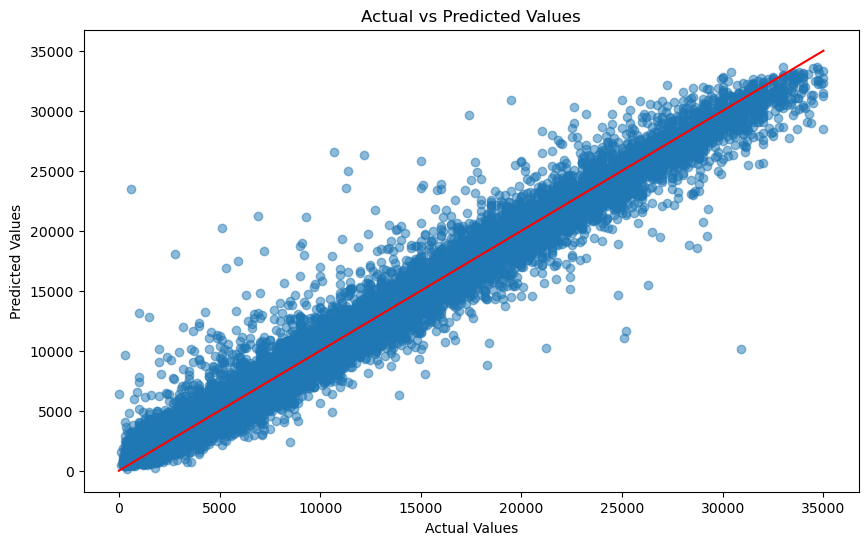

In [21]:
import matplotlib.pyplot as plt

# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [22]:
y_pred_nn = y_pred_test

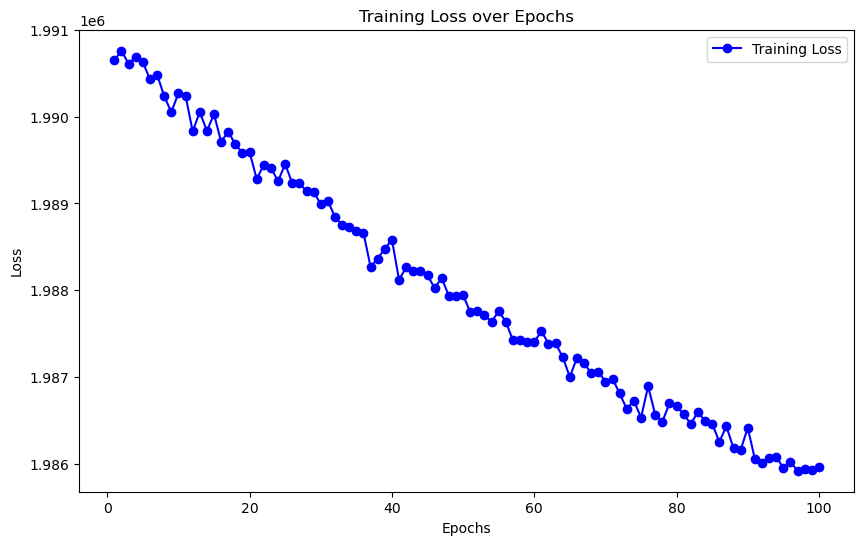

In [23]:
import matplotlib.pyplot as plt

# Training the model and capturing the training history
history = best_nn.fit(x_combined, y_combined, epochs=100, batch_size=10, verbose=0)

# Extracting the loss values
train_loss = history.history['loss']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Creating the plot for training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4. Result Comparison

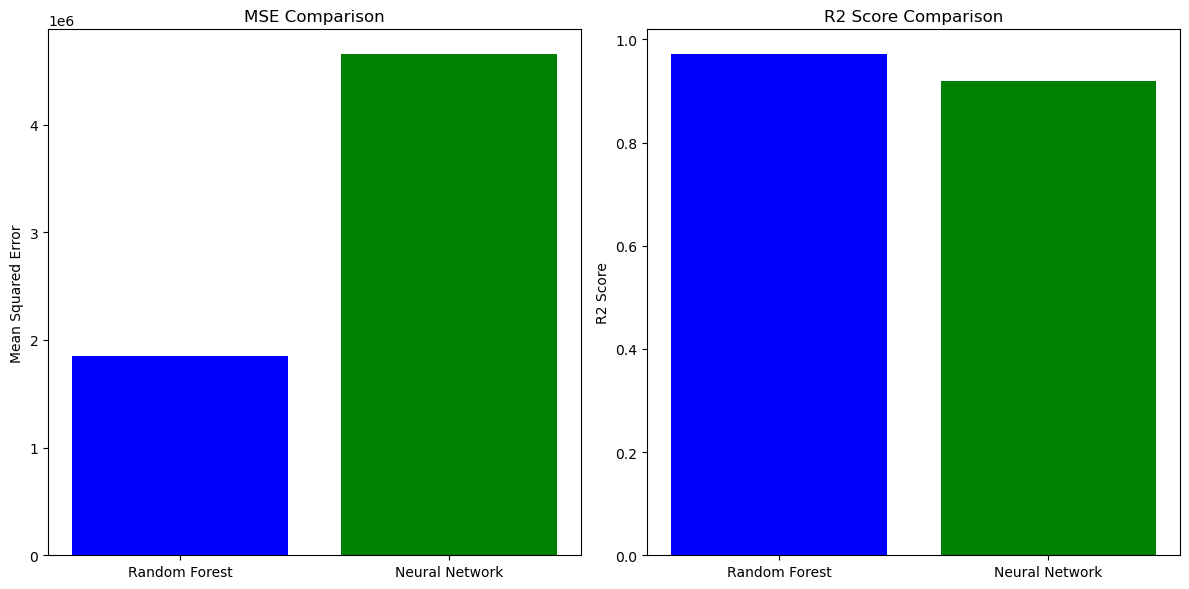

In [24]:
import matplotlib.pyplot as plt
 
# Performance metrics for both models
mse_rf = 1847116.4454124921  # MSE for Random Forest
r2_rf = 0.970915451824928  # R2 Score for Random Forest
 
mse_nn = 4651585.7596018305  # MSE for Neural Network
r2_nn = 0.9188316406970354  # R2 Score for Neural Network
 
# Creating a DataFrame for comparison
comparison_data = {
    "Model": ["Random Forest", "Neural Network"],
    "MSE": [mse_rf, mse_nn],
    "R2 Score": [r2_rf, r2_nn]
}
comparison_df = pd.DataFrame(comparison_data)
 
# Plotting the comparison
plt.figure(figsize=(12, 6))
 
# Plot MSE Comparison
plt.subplot(1, 2, 1)
plt.bar(comparison_df["Model"], comparison_df["MSE"], color=["blue", "green"])
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")
 
# Plot R2 Score Comparison
plt.subplot(1, 2, 2)
plt.bar(comparison_df["Model"], comparison_df["R2 Score"], color=["blue", "green"])
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
 
plt.tight_layout()
plt.show()

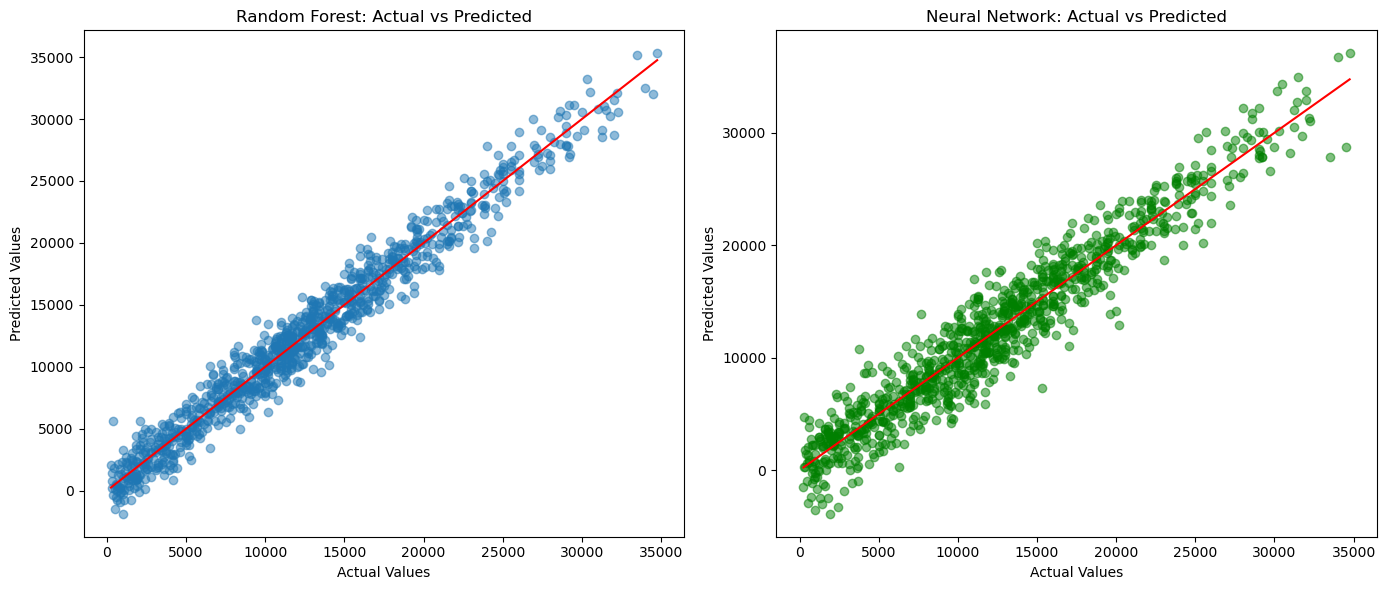

In [25]:
# Simulating predictions
y_test_sample = np.random.choice(y_test, 1000)  # Select 100 random samples from y_test for plotting
errors_rf = np.sqrt(mse_rf) * np.random.randn(1000)  # Random errors based on RF MSE
y_pred_rf_sample = y_test_sample + errors_rf  # Simulated RF predictions
 
errors_nn = np.sqrt(mse_nn) * np.random.randn(1000)  # Random errors based on NN MSE
y_pred_nn_sample = y_test_sample + errors_nn  # Simulated NN predictions
 
# Plotting
plt.figure(figsize=(14, 6))
 
# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test_sample, y_pred_rf_sample, alpha=0.5)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], color='red')  # Ideal line
 
# Neural Network
plt.subplot(1, 2, 2)
plt.scatter(y_test_sample, y_pred_nn_sample, alpha=0.5, color='green')
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], color='red')  # Ideal line
 
plt.tight_layout()
plt.show()

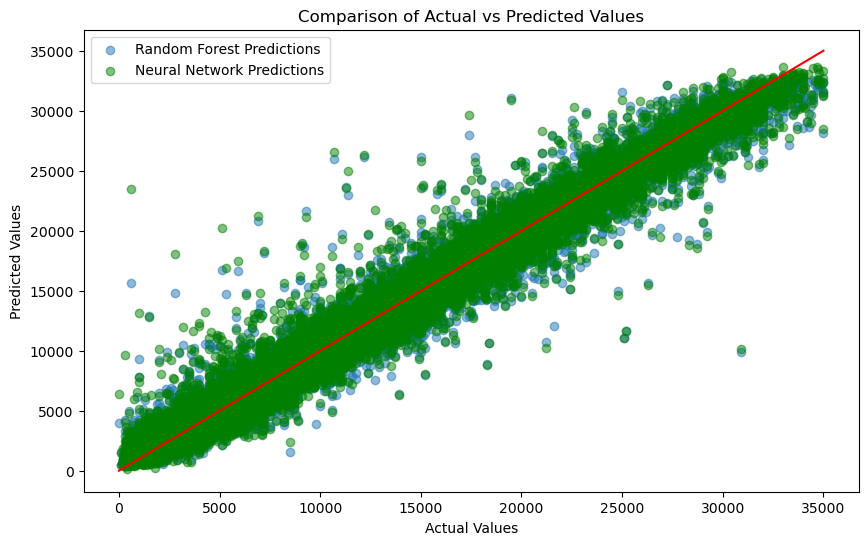

In [26]:
# Combining the scatter plots for Random Forest and Neural Network in a single plot
 
plt.figure(figsize=(10, 6))
 
# Plotting both Random Forest and Neural Network predictions
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest Predictions')
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='green', label='Neural Network Predictions')
 
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal line
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fitting the model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predicting and Evaluating
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")

Linear Regression - MSE: 1950765.654, R^2: 0.966393000654482


In [28]:
from sklearn.neighbors import KNeighborsRegressor  # or KNeighborsClassifier for classification

# Fitting the model
knn_model = KNeighborsRegressor(n_neighbors=5)  # adjust n_neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Predicting and Evaluating
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse_knn}, R^2: {r2_knn}")

KNN - MSE: 2981034.2293879995, R^2: 0.9486439515732784


In [29]:
import xgboost as xgb

# Fitting the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')  # Use XGBClassifier for classification
xgb_model.fit(X_train_scaled, y_train)

# Predicting and Evaluating
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, R^2: {r2_xgb}")


XGBoost - MSE: 1824036.656997368, R^2: 0.9685762364063483


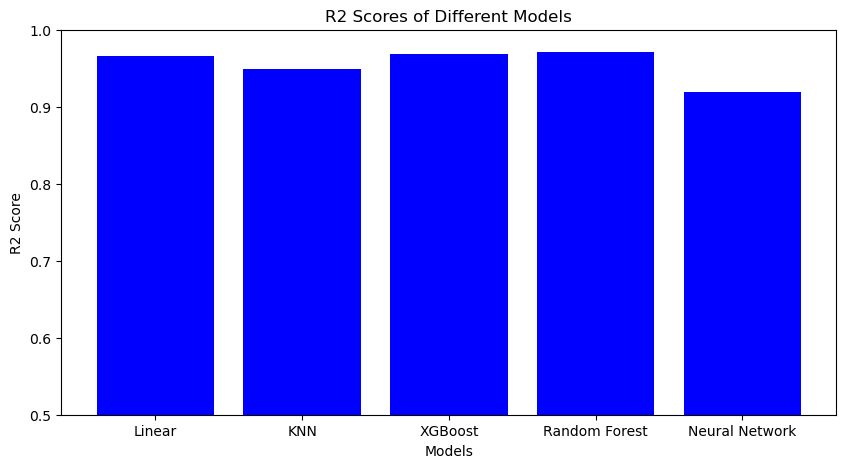

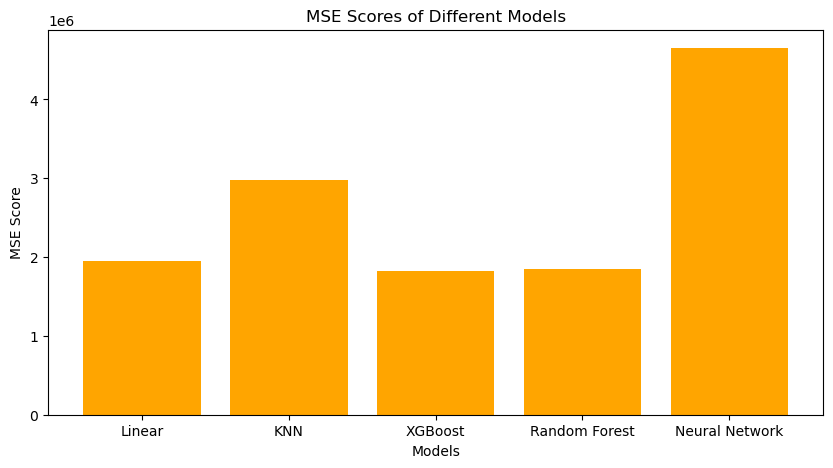

In [30]:
import matplotlib.pyplot as plt

# Create lists for easy plotting
models = ['Linear', 'KNN', 'XGBoost', 'Random Forest', 'Neural Network']
r2_scores = [r2_linear, r2_knn, r2_xgb, r2_rf, r2_nn]
mse_scores = [mse_linear, mse_knn, mse_xgb, mse_rf, mse_nn]

# Plotting R2 Scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Models')
plt.ylim([0.5, 1])  # Adjust the y-axis limits as needed
plt.show()

# Plotting MSE Scores
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('MSE Scores of Different Models')
plt.show()
